In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf
import plotly.graph_objects as go 
import mplfinance as mpf

In [31]:
ticker = 'SOL-USD'
start = '2022-01-01'
end = '2024-07-28'
data = yf.download(ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


c:\Users\cboon\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


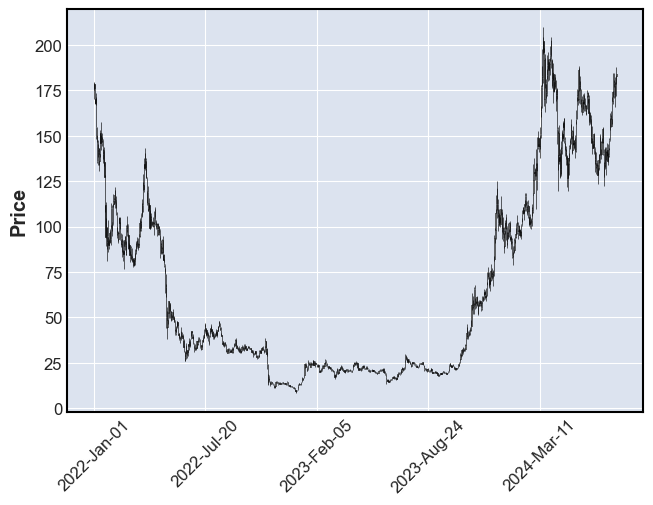

In [32]:
mpf.plot(data, type='candle')

In [21]:
#Daily returns and 20-day MA
data['returns'] = data['Adj Close'].pct_change()
data['MA_20'] = data['Adj Close'].rolling(window=20).mean()

Text(0.5, 1.0, 'Daily ret and 20-day MA')

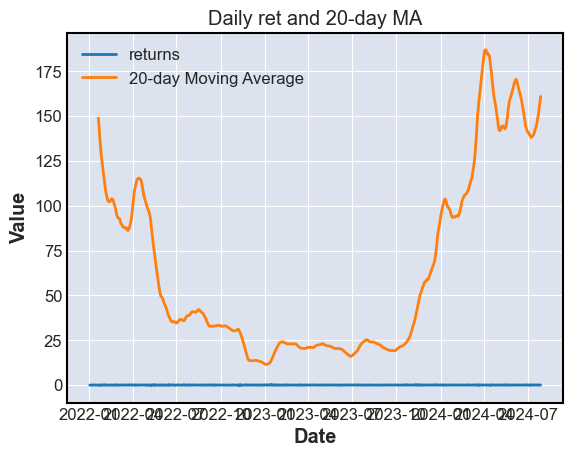

In [22]:
#Visualizing the data in line plot
plt.plot(data.index, data['returns'], label= 'returns')
plt.plot(data.index, data['MA_20'], label='20-day Moving Average')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily ret and 20-day MA')

In [23]:
# Market making strategy place bid-orders when adj close price is below MA_20 and ask-orders when above.
data['bid'] = np.where(data['Adj Close'] < data['MA_20'], data['Adj Close'], np.nan)
data['ask'] = np.where(data['Adj Close'] > data['MA_20'], data['Adj Close'], np.nan)

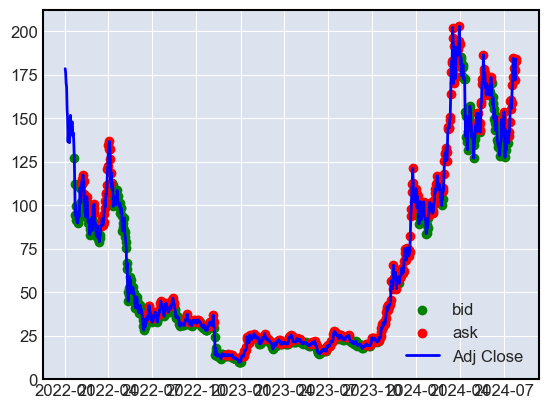

In [24]:
#Visualizing strategy
plt.scatter(data.index, data['bid'], color='green', label='bid')
plt.scatter(data.index, data['ask'], color='red', label='ask')
plt.plot(data.index, data['Adj Close'], color='blue', label='Adj Close')
plt.legend()

In [25]:
#Backtesting the strategy 
data['PnL'] = np.where(data['bid'].shift(1) > 0, data['ask'] - data['bid'].shift(1), 0)
data['cum_PnL'] = data['PnL'].cumsum()

Text(0.5, 1.0, 'Cumulative Profit/Loss')

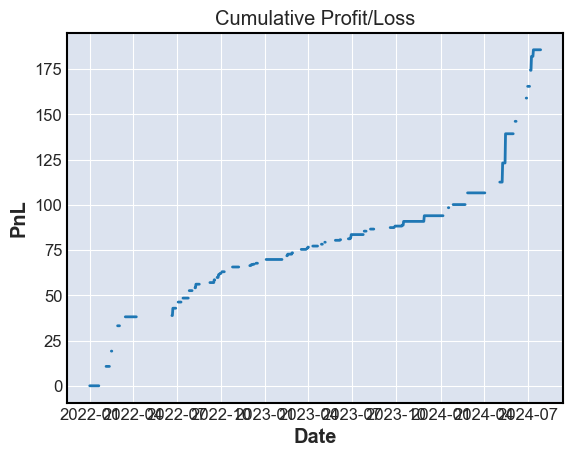

In [28]:
#Plotting
plt.plot(data.index, data['cum_PnL'])
plt.xlabel('Date')
plt.ylabel('PnL')
plt.title('Cumulative Profit/Loss')